In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset
df = pd.read_csv('csv_files/combined_data.csv')

In [3]:
df

,Unnamed: 0,USER,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,0,Subject1,6,5,6,6,6,6,5,6,...,0.100639,-0.182320,0.108933,-0.086876,0.102525,0.008190,-0.236708,-0.295113,0.385691,0.336576
1,1,Subject2,0,0,0,0,0,1,3,0,...,-0.030667,-0.153180,0.130563,-0.086958,0.084553,0.039385,-0.146900,-0.298797,0.358410,0.428483
2,2,Subject3,1,6,0,0,2,1,3,1,...,-0.063319,-0.261499,0.140101,-0.122861,0.124406,-0.017984,-0.158476,-0.172822,0.270584,0.426972
3,3,Subject4,2,1,4,6,1,6,4,5,...,0.043089,-0.207021,0.135036,-0.074184,0.155560,0.121889,-0.207565,-0.337076,0.370116,0.328862
4,4,Subject5,6,0,3,6,5,4,3,1,...,-0.044701,-0.218263,0.122511,-0.066349,0.100347,0.059433,-0.146092,-0.317965,0.378754,0.439828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,Subject70,0,0,0,0,0,0,0,0,...,-0.026926,-0.175980,0.062150,-0.097276,0.049301,0.054396,-0.162456,-0.193348,0.305240,0.486529
70,70,Subject71,6,0,6,6,0,4,0,1,...,-0.054233,-0.154628,0.055183,-0.080547,0.114158,0.052118,-0.208308,-0.298104,0.326223,0.433215
71,71,Subject72,0,0,0,0,0,0,1,1,...,0.084031,-0.131269,0.064756,-0.019835,0.126615,-0.004574,-0.134545,-0.273466,0.303105,0.397931
72,72,Subject73,3,1,2,3,3,1,3,2,...,-0.045603,-0.189933,0.058660,-0.076568,0.151434,0.043682,-0.155111,-0.256472,0.300448,0.380891


In [4]:
# response and feature columns
feature_cols = [col for col in df.columns if col.startswith('embedding_')]
response_cols = [f'Q{i}' for i in range(1, 29) if f'Q{i}' in df.columns]

In [5]:
response_cols

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28']

In [6]:
X = df[feature_cols]
Y = df[response_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
model_predictions = {}

models = {
    "RandomForest": RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier(),
    "Ridge": RidgeClassifierCV(),
    "SVM": SVC(decision_function_shape='ovo')
}

In [9]:
import numpy as np

In [10]:
for model_name, model in models.items():
    # Some models require a wrapper to support multi-output
    if model_name in ["Ridge", "SVM"]:
        model = MultiOutputClassifier(model)
    elif model_name == "XGBoost":
        model = MultiOutputClassifier(XGBClassifier(objective='multi:softprob', num_class=7))
    print(f"Training {model_name} model...")
    model.fit(X_train, Y_train)
    print(f"Predicting with {model_name} model...")
    Y_pred = model.predict(X_test)
    model_predictions[model_name] = Y_pred
    print(f"{model_name} predictions complete.")

Training RandomForest model...
Predicting with RandomForest model...
RandomForest predictions complete.
Training ExtraTrees model...
Predicting with ExtraTrees model...
ExtraTrees predictions complete.
Training XGBoost model...


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/

Predicting with XGBoost model...


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/

XGBoost predictions complete.
Training Ridge model...
Predicting with Ridge model...
Ridge predictions complete.
Training SVM model...
Predicting with SVM model...
SVM predictions complete.


In [11]:
for model_name, predictions in model_predictions.items():
    print(f"\nPredictions by {model_name} model:")
    print(predictions)


Predictions by RandomForest model:
[[6 0 0 0 0 1 3 0 6 6 6 6 0 0 0 0 6 0 0 6 2 0]
 [6 0 6 0 0 6 0 0 0 6 1 3 0 0 0 1 2 0 0 1 2 0]
 [6 0 6 6 6 6 6 0 6 6 6 6 0 3 0 6 6 0 6 6 6 6]
 [6 1 6 6 6 6 6 6 6 6 6 6 3 6 2 6 6 0 6 6 6 6]
 [0 0 0 0 0 6 0 0 0 1 1 3 0 1 0 0 6 0 4 6 5 6]
 [6 0 0 0 0 6 0 0 0 6 6 6 0 1 0 6 6 0 6 6 2 6]
 [6 0 4 0 0 6 3 0 6 6 6 6 1 1 0 6 6 6 6 6 6 6]
 [6 0 4 0 0 6 0 0 0 6 6 6 0 1 0 2 6 0 6 6 2 6]
 [6 1 0 6 0 6 3 0 6 6 6 6 1 6 2 6 6 0 6 6 6 6]
 [6 1 6 6 6 6 5 0 6 6 6 6 0 3 0 6 5 0 6 5 6 6]
 [6 0 6 6 0 6 6 6 6 6 6 6 0 1 0 6 6 0 6 6 6 6]
 [0 0 0 0 0 6 0 0 0 0 1 0 0 0 0 0 6 0 6 6 0 0]
 [6 1 6 6 6 6 3 0 6 6 6 6 1 6 2 6 6 6 6 6 6 6]
 [6 0 6 6 0 6 6 6 6 6 6 6 0 6 0 6 6 0 6 6 6 6]
 [6 1 0 0 0 6 0 0 6 6 6 6 0 1 0 6 6 0 6 6 2 6]]

Predictions by ExtraTrees model:
[[6 0 0 0 0 6 0 0 0 6 0 6 0 0 0 0 6 0 0 6 4 0]
 [0 0 6 0 0 6 0 0 0 6 6 6 0 0 0 1 5 0 4 0 0 0]
 [6 0 6 6 6 6 6 0 6 6 6 6 0 3 0 6 6 0 6 6 6 6]
 [6 1 6 6 6 6 4 5 6 6 6 6 1 2 3 5 6 4 6 6 6 6]
 [0 0 0 0 0 6 0 0 0 1 1 3 0 1 0 0 6 

In [12]:
Y_test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
4,6,0,3,6,5,4,3,1,3,0,...,5,2,1,0,1,0,4,5,2,3
63,0,0,3,0,0,1,0,0,0,0,...,0,1,0,1,1,0,2,3,2,4
18,1,1,0,0,3,1,0,1,0,1,...,1,0,0,3,3,0,4,4,1,1
0,6,5,6,6,6,6,5,6,6,6,...,5,6,6,6,6,6,6,6,6,6
28,2,0,0,0,0,3,1,0,6,0,...,1,0,0,1,2,0,0,1,1,1
73,5,1,5,6,6,1,3,3,0,1,...,0,1,0,1,5,0,3,6,3,4
10,2,1,1,1,1,2,0,2,1,1,...,0,1,0,3,3,1,5,4,4,2
34,6,5,5,5,6,6,4,4,6,6,...,1,1,1,6,3,5,5,3,4,4
12,5,2,1,2,5,6,2,1,4,6,...,4,6,1,5,5,1,2,3,4,5
55,5,5,5,1,6,6,6,6,2,1,...,1,6,3,6,6,4,6,6,5,6


In [13]:
from sklearn.metrics import accuracy_score, mean_absolute_error
acc_vals = []
mean_zero_one_errors = []
mae_vals = []
for model_name, predictions in model_predictions.items():
    Y_test_array = Y_test.values
    predictions = model_predictions[model_name]
    accuracies = []
    mae_errors = [] 
    for i in range(Y_test_array.shape[0]):
        acc = accuracy_score(Y_test_array[i, :], predictions[i, :])
        accuracies.append(acc)
        mae = mean_absolute_error(Y_test_array[i, :], predictions[i, :])
        mae_errors.append(mae)
        
        # print(f"Accuracy for user{i+1}: {acc:.4f}")
        # print(f"MAE for user{i+1}: {mae:.4f}")

    overall_accuracy = sum(accuracies) / len(accuracies)
    mean_zero_one_error = 1 - overall_accuracy
    overall_mae = sum(mae_errors) / len(mae_errors)
    mean_zero_one_errors.append(mean_zero_one_error)
    mae_vals.append(overall_mae)
    
    acc_vals.append(overall_accuracy)

    print(f"Overall accuracy for {model_name}: {overall_accuracy:.4f}")
    print(f"Mean Zero-one error for {model_name}: {mean_zero_one_error:.4f}")
    print(f"Mean Absolute Error (MAE) for {model_name}: {overall_mae:.4f}")
    print()


Overall accuracy for RandomForest: 0.3303
Mean Zero-one error for RandomForest: 0.6697
Mean Absolute Error (MAE) for RandomForest: 2.1091

Overall accuracy for ExtraTrees: 0.3030
Mean Zero-one error for ExtraTrees: 0.6970
Mean Absolute Error (MAE) for ExtraTrees: 2.1515

Overall accuracy for XGBoost: 0.2606
Mean Zero-one error for XGBoost: 0.7394
Mean Absolute Error (MAE) for XGBoost: 2.2303

Overall accuracy for Ridge: 0.3121
Mean Zero-one error for Ridge: 0.6879
Mean Absolute Error (MAE) for Ridge: 2.1818

Overall accuracy for SVM: 0.3061
Mean Zero-one error for SVM: 0.6939
Mean Absolute Error (MAE) for SVM: 2.4303



In [14]:
acc_vals

[0.33030303030303027,
 0.303030303030303,
 0.26060606060606056,
 0.31212121212121213,
 0.30606060606060603]

In [15]:
model_list = ['RandomForest', 'ExtraTrees', 'XGBoost', 'Ridge', 'SVM']
accuracies_pca = [0.3181818181818182, 0.32727272727272727, 0.2515151515151515, 0.19999999999999993, 0.3212121212121212]
accuracies_embeddings = acc_vals

In [16]:
import matplotlib.pyplot as plt

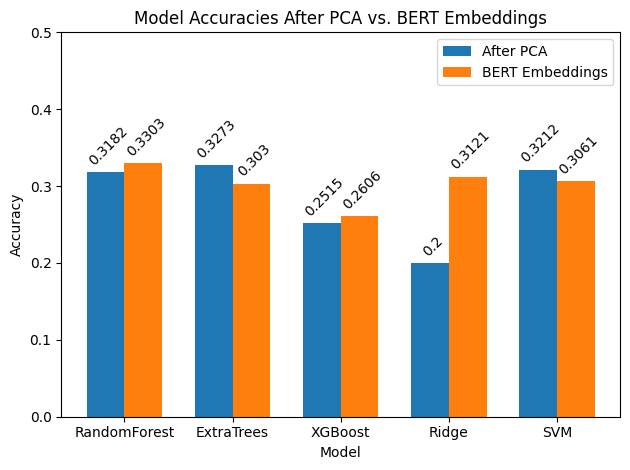

In [17]:
x = np.arange(len(model_list))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies_pca, width, label='After PCA')
rects2 = ax.bar(x + width/2, accuracies_embeddings, width, label='BERT Embeddings')

ax.set_ylim(0, 0.5)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies After PCA vs. BERT Embeddings')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 3),  # 10 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=45)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [19]:
for model_name, model in models.items():

dict_items([('RandomForest', RandomForestClassifier()), ('ExtraTrees', ExtraTreesClassifier()), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('Ridge', RidgeClassifierCV()), ('SVM', SVC(decision_function_shape='ovo'))])